<center><a href="https://www.nvidia.com/en-us/training/"><img src="https://dli-lms.s3.amazonaws.com/assets/general/DLI_Header_White.png" width="400" height="186" /></a></center>




# Building a Brain in 10 Minutes

Many decades ago, artificial neural networks were developed to mimic the learning capabilities of humans and animals. Below is an excerpt from [The Machine that Changed the World](https://www.youtube.com/watch?v=enWWlx7-t0k&t=166s), a 1992 documentary about Artificial Intelligence.

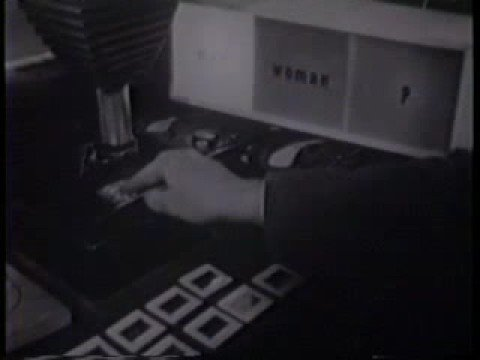

In [46]:
from IPython.display import YouTubeVideo
YouTubeVideo('cNxadbrN_aI')

Since then, computers and machine learning libraries have evolved to where we can replicate many days of experimentation in just a few minutes. In this notebook, we will step through how artificial neural networks have improved over the years and the biological inspiration behind it.

To demonstrate, we will be using [TensorFlow](https://www.tensorflow.org/), an open-source machine learning library popular in industry. Recent versions of TensorFlow automatically detect if there is a GPU available for computation.

In [47]:
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt

tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [48]:
tf.__version__

'2.11.0'

GPUs were originally designed for the significant amount of matrix mathematics used when rendering computer graphics. Neural networks also require a significant amount of matrix multiplication, making GPUs a good fit when building them.

## Data

Speaking of graphics, we're going to tackle a challenge that seemed almost impossible decades ago: image classification with computer vision. Specifically, we will try to classify articles of clothing from the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset. A few samples are shown below:

<center><img src="https://github.com/zalandoresearch/fashion-mnist/blob/master/doc/img/fashion-mnist-sprite.png?raw=true" width="400" /></center>

## Labels:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |


Neural networks attempt to copy the human learning technique, Trial and Error. To do this, we will create something like a set of digital flashcards. Our artificial brains will attempt to guess what kind of clothing we are showing it with a flashcard, then we will give it the answer, helping the computer learn from its successes and mistakes.

Just like how students are quizzed to test their understanding, we will set aside a portion of our data to quiz our neural networks to make sure they understand the concepts we're trying to teach them, as opposed to them memorizing the answers to their study questions. For trivia, memorization might be an acceptable strategy, but for skills, like adding two numbers, memorization won't get our models very far.

The study data is often called the `training dataset` and the quiz data is often called the `validation dataset`. As Fashion MNIST is a popular dataset, it is already included with the TensorFlow library. Let's load it into our coding environment and take a look at it.

## Loading the Data Into Memory (with Keras)

In [49]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (valid_images, valid_labels) = fashion_mnist.load_data()

Let's start with our `train_images` and `train_labels`. `train_images` are like the question on our flashcards and `train_labels` are like the answer. In general, data scientists often refer to this answer as the `label`.

We can plot one of these images to see what it looks like. To do so, we will use [Matplotlib](https://matplotlib.org/).

## Exploring the FashionMNIST Data

We stated above that the Fashion MNIST dataset contained 70,000 grayscale images of fashion images. By executing the following cells, we can see that Keras has partitioned 60,000 of these images for training, and 10,000 for validation (after training), and also, that each image itself is a 2D array with the dimensions 28x28:

In [50]:
train_images.shape

(60000, 28, 28)

In [51]:
valid_images.shape

(10000, 28, 28)

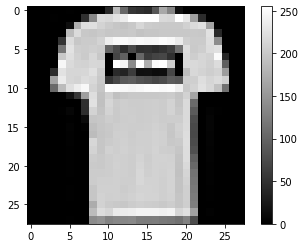

In [52]:
# The question number to study with. Feel free to change up to 59999.
data_idx = 1

plt.figure()
plt.imshow(train_images[data_idx], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [53]:
train_labels[0]

9

What would you classify this as? To make it easier, here are the ten categories it could be:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

Have an answer? Run the following code cell to see if you were correct:

In [54]:
train_labels[data_idx]

0

How did you do? Good job if you got it correct!

Our validation data has a similar structure of questions and answers:

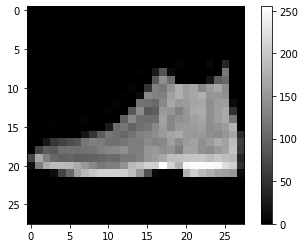

In [55]:
# The question number to quiz with. Feel free to change up to 9999.
data_idx = 0

plt.figure()
plt.imshow(valid_images[data_idx], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [56]:
valid_labels[data_idx]

9

In [57]:
train_images.dtype

dtype('uint8')

In [58]:
train_images.min(), train_images.max()

(0, 255)

In [59]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

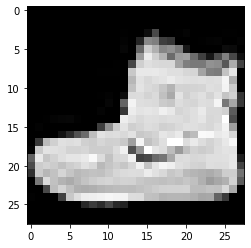

In [60]:
import matplotlib.pyplot as plt

image = train_images[0]
plt.imshow(image, cmap='gray')

In [61]:
# 28 lists with 28 values each
valid_images[data_idx]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

# Preparing the Data for Training

*Comments from Victor Calinao Jr*

In deep learning, it is common that data needs to be transformed to be in the ideal state for training. For this particular image classification problem, there are 3 tasks we should perform with the data in preparation for training:

1. Flatten the image data, to simplify the image input into the model
2. Normalize the image data, to make the image input values easier to work with for the model
3. Categorize the labels, to make the label values easier to work with for the model

### Data Preparation

Use `shape` to show dimensions of data

In [69]:
train_images.shape # 60000 train images, x dimensions (in pixels), y dimensions (in pixels)

(60000, 28, 28)

In [70]:
valid_images.shape # 60000 train images, x dimensions (in pixels), y dimensions (in pixels)

(10000, 28, 28)

In [71]:
train_images.dtype

dtype('uint8')

## Flattening the Image Data

Flattening the image data does not guarantee a better learning outcome, or is it? We'll try both ways and compare what is the difference of flattening the image data.

### Applying reshape

Though it's possible for a deep learning model to accept a 2-dimensional image (in our case 28x28 pixels), we're going to simplify things to start and [reshape](https://www.tensorflow.org/api_docs/python/tf/reshape) each image into a single array of 784 continuous pixels (note: 28x28 = 784). This is also called flattening the image.

Here we accomplish this using the helper method `reshape`:


In [72]:
flat_train_images = train_images.reshape(60000, 784)
flat_valid_images = valid_images.reshape(10000, 784)

In [73]:
flat_train_images.shape

(60000, 784)

In [74]:
flat_train_images[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,
         4,   0,   0,   0,   0,   1,   1,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,
        54,   0,   0,   0,   1,   3,   4,   0,   0,   3,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204,
       176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

## Normalizing the Image Data

Deep learning models are better at dealing with floating point numbers between 0 and 1 (more on this topic later). Converting integer values to floating point values between 0 and 1 is called [normalization](https://developers.google.com/machine-learning/glossary#normalization), and a simple approach we will take here to normalize the data will be to divide all the pixel values (which if you recall are between 0 and 255) by 255:

In [75]:
flat_train_images = flat_train_images.astype('float32') / 255
flat_valid_images = flat_valid_images.astype('float32') / 255

In [76]:
flat_train_images.dtype

dtype('float32')

In [77]:
flat_train_images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## Categorical Encoding the Labels

The labels are encoded from 0 to 9 which corresponds to the ground truth. Keras provides a utility to [categorically encode values](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical), and here we use it to perform categorical encoding for both the training and validation labels:

In [78]:
import tensorflow.keras as keras
num_classes = 10

binary_train_labels = keras.utils.to_categorical(train_labels, num_classes)
binary_valid_labels = keras.utils.to_categorical(valid_labels, num_classes)

In [79]:
binary_train_labels[0:9]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [80]:
train_labels[data_idx]

9

In [81]:
binary_train_labels[data_idx]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

# Creating the Model

With the data prepared for training, it is now time to create the model that we will train with the data. This first basic model will be made up of several *layers* and will be comprised of 3 main parts:

1. An input layer, which will receive data in some expected format
2. Several [hidden layers](https://developers.google.com/machine-learning/glossary#hidden-layer), each comprised of many *neurons*. Each [neuron](https://developers.google.com/machine-learning/glossary#neuron) will have the ability to affect the network's guess with its *weights*, which are values that will be updated over many iterations as the network gets feedback on its performance and learns
3. An output layer, which will depict the network's guess for a given image

## Instantiating the Model

To begin, we will use Keras's [Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) model class.

TensorFlow's Sequential API allows users to create models layer-by-layer for most types of neural networks. It simplifies the process of building deep learning models by allowing users to create models layer-by-layer, without having to explicitly define a computational graph. This makes it easy to quickly create complex models and experiment with different types of layers, such as convolutional layers, recurrent layers, and more.

This is to instantiate an instance of a model that will have a series of layers that data will pass through in sequence:



In [82]:
from tensorflow.keras.models import Sequential

model = Sequential()

## Creating the Input Layer

Next, we will add the input layer. This layer will be *densely connected*, meaning that each neuron in it, and its weights, will affect every neuron in the next layer. To do this with Keras, we use Keras's [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) layer class.

In [83]:
from tensorflow.keras.layers import Dense

The `units` argument specifies the number of neurons in the layer. We are going to use `512` which we have chosen from experimentation. Choosing the correct number of neurons is what puts the "science" in "data science" as it is a matter of capturing the statistical complexity of the dataset. Try playing around with this value later to see how it affects training and to start developing a sense for what this number means.

We will learn more about activation functions later, but for now, we will use the `relu` activation function, which in short, will help our network to learn how to make more sophisticated guesses about data than if it were required to make guesses based on some strictly linear function.

The `input_shape` value specifies the shape of the incoming data which in our situation is a 1D array of 784 values:

In [84]:
model.add(Dense(units=512, activation='relu', input_shape=(784,)))

## Creating the Hidden Layer

Now we will add an additional densely connected layer. Again, much more will be said about these later, but for now know that these layers give the network more parameters to contribute towards its guesses, and therefore, more subtle opportunities for accurate learning:

In [85]:
model.add(Dense(units=512, activation='softmax'))

## Creating the Output Layer

Finally, we will add an output layer. This layer uses the activation function `softmax` which will result in each of the layer's values being a probability between 0 and 1 and will result in all the outputs of the layer adding to 1. In this case, since the network is to make a guess about a single image belonging to 1 of 10 possible categories, there will be 10 outputs. Each output gives the model's guess (a probability) that the image belongs to that specific class:

In [86]:
model.add(Dense(units=10, activation='softmax'))

## Summarizing the Model

Keras provides the model instance method [summary](https://www.tensorflow.org/api_docs/python/tf/summary) which will print a readable summary of a model:

In [87]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


## Compiling the Model

Again, more details are to follow, but the final step we need to do before we can actually train our model with data is to [compile](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#compile) it. Here we specify a [loss function](https://developers.google.com/machine-learning/glossary#loss) which will be used for the model to understand how well it is performing during training. We also specify that we would like to track `accuracy` while the model trains:

In [88]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training the Model

Now that we have prepared training and validation data, and a model, it's time to train our model with our training data, and verify it with its validation data.

"Training a model with data" is often also called "fitting a model to data." Put this latter way, it highlights that the shape of the model changes over time to more accurately understand the data that it is being given.

When fitting (training) a model with Keras, we use the model's [fit](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) method. It expects the following arguments:

* The training data
* The labels for the training data
* The number of times it should train on the entire training dataset (called an *epoch*)
* The validation or test data, and its labels

Run the cell below to train the model. We will discuss its output after the training completes:

In [89]:
epochs_num= 30
history = model.fit(
    flat_train_images, 
    binary_train_labels, 
    epochs=epochs_num, 
    verbose=1, 
    validation_data=(flat_valid_images, binary_valid_labels)
)

Epoch 1/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4646 - accuracy: 0.8304 - val_loss: 0.4174 - val_accuracy: 0.8446
Epoch 2/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3502 - accuracy: 0.8702 - val_loss: 0.3573 - val_accuracy: 0.8691
Epoch 3/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3141 - accuracy: 0.8816 - val_loss: 0.3412 - val_accuracy: 0.8727
Epoch 4/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2863 - accuracy: 0.8924 - val_loss: 0.3278 - val_accuracy: 0.8806
Epoch 5/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2673 - accuracy: 0.8985 - val_loss: 0.3276 - val_accuracy: 0.8818
Epoch 6/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2507 - accuracy: 0.9045 - val_loss: 0.3267 - val_accuracy: 0.8849
Epoch 7/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2373 - accuracy: 0.9092 - val_loss: 0.3231 - val_accurac

## Observing Accuracy

For each of the 5 epochs, notice the `accuracy` and `val_accuracy` scores. `accuracy` states how well the model did for the epoch on all the training data. `val_accuracy` states how well the model did on the validation data, which if you recall, was not used at all for training the model.

The model did quite well! The accuracy quickly reached close to 100%, as did the validation accuracy. We now have a model that can be used to accurately detect and classify hand-written images.

The next step would be to use this model to classify new not-yet-seen handwritten images. This is called [inference](https://blogs.nvidia.com/blog/2016/08/22/difference-deep-learning-training-inference-ai/). We'll explore the process of inference in a later exercise. 

## Plotting the Training and Validation Loss

In [90]:
print(history.history)

{'loss': [0.4645697772502899, 0.3502311408519745, 0.3141157627105713, 0.2862967550754547, 0.26734715700149536, 0.25074827671051025, 0.23734541237354279, 0.2233947068452835, 0.2115873098373413, 0.20120874047279358, 0.1905701458454132, 0.18370875716209412, 0.17276102304458618, 0.16597259044647217, 0.1571597009897232, 0.15146683156490326, 0.1444646269083023, 0.13709117472171783, 0.13129352033138275, 0.12626494467258453, 0.12292135506868362, 0.11885567754507065, 0.11562186479568481, 0.11039237678050995, 0.1032484918832779, 0.10385918617248535, 0.09751439839601517, 0.09241169691085815, 0.09197404980659485, 0.0883815810084343], 'accuracy': [0.8303666710853577, 0.8701833486557007, 0.8815833330154419, 0.8924499750137329, 0.8984666466712952, 0.9044666886329651, 0.9091833233833313, 0.9146000146865845, 0.9198166728019714, 0.9235333204269409, 0.9276666641235352, 0.9293000102043152, 0.934066653251648, 0.9354333281517029, 0.9394500255584717, 0.940833330154419, 0.9444000124931335, 0.9472333192825317,

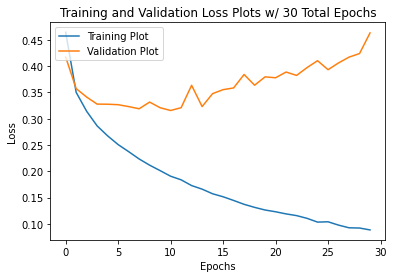

In [91]:
# Plotting the Training and Validation Plot

plt.title("Training and Validation Loss Plots w/ {} Total Epochs".format(epochs_num))
plt.plot(history.history['loss'], label = "Training Plot")
plt.plot(history.history['val_loss'], label = "Validation Plot")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc='upper left')

How did the model do? B-? To give it credit, it only had `10` neurons to work with. Us humans have billions!

The accuracy should be around 80%, although there is some random variation based on how the flashcards are shuffled and the random value of the weights that were initiated.

### Prediction

Time to graduate our model and let it enter the real world. We can use the [predict](https://www.tensorflow.org/api_docs/python/tf/keras/Model#predict) method to see the output of our model on a set of images, regardless of if they were in the original datasets or not.

Please note, Keras expects a batch, or multiple datapoints, when making a prediction. To make a prediction on a single point of data, it should be converted to a batch of one datapoint.

Below are the predictions for the first ten items in our training dataset.

In [92]:
pred = model.predict(flat_valid_images[0:10])

1/1 [==============================] - 0s 65ms/step


In [93]:
import numpy as np

np.argmax(pred, 1)

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [94]:
valid_labels[0:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

These are raw results and need some formatting to be interpreted by the average human, so below, we've displayed an image to be classified as well as graph the results of each of our output neurons. The larger the value, the more confident the neuron is that it corresponds to the correct label (and the more negative it is, the more confident it is that it is **not** the correct label).

Alter the `data_idx` below to see how the model predicts against various images. How do you think it did? For the predictions it got wrong, would you have been confused too?

Here's the table again for reference:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

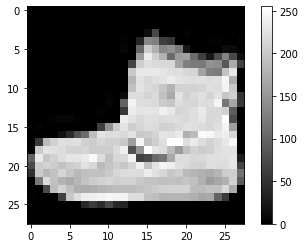

1/1 [==============================] - 0s 40ms/step


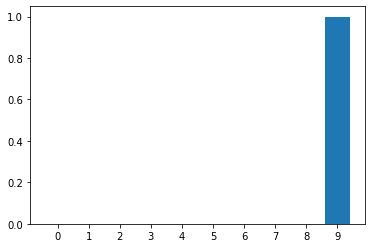

predicted:  9
correct answer: 9


In [95]:
import numpy as np

data_idx = 0 # The question number to study with. Feel free to change up to 59999.

plt.figure()
plt.imshow(train_images[data_idx], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

x_values = range(num_classes)

pred = model.predict(flat_train_images[data_idx:data_idx+1]).flatten()

plt.figure()
plt.bar(x_values, pred)
plt.xticks(range(10))
plt.show()

print("predicted: ", np.argmax(pred))
print("correct answer:", train_labels[data_idx])

# Summary

It's worth taking a moment to appreciate what we've done here. Historically, the expert systems that were built to do this kind of task were extremely complicated, and people spent their careers building them (check out the references on the [official MNIST page](http://yann.lecun.com/exdb/mnist/) and the years milestones were reached).

MNIST is not only useful for its historical influence on Computer Vision, but it's also a great [benchmark](http://www.cs.toronto.edu/~serailhydra/publications/tbd-iiswc18.pdf) and debugging tool. Having trouble getting a fancy new machine learning architecture working? Check it against MNIST. If it can't learn on this dataset, chances are it won't learn on more complicated images and datasets.

# Conclusion

Congratulations on completing the notebook! While this model does significantly better than random guessing, it has a way to go before it can beat humans at recognizing clothing. Want to make computer vision models that can surpass humans in image classification? Learn more about the mechanics of neural networks and how to make more accurate models in our self-paced [Getting Started with Deep Learning](https://courses.nvidia.com/courses/course-v1:DLI+S-FX-01+V1/about) online course.

<center><a href="https://www.nvidia.com/en-us/training/"><img src="https://dli-lms.s3.amazonaws.com/assets/general/DLI_Header_White.png" width="400" height="186" /></a></center>